In [1]:
import pandas as pd 
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
import tensorflow as tf
import matplotlib.pyplot as plt 

In [2]:
df = pd.read_csv('datamobil.csv',sep = ';',encoding = 'UTF-8')
df.head()

,Unnamed: 0,horsepower,price
0,0,111.0,13495.0
1,1,111.0,16500.0
2,2,154.0,16500.0
3,3,102.0,13950.0
4,4,115.0,17450.0


In [3]:
df = df.drop(columns = ['Unnamed: 0'])
df

,horsepower,price
0,111.0,13495.0
1,111.0,16500.0
2,154.0,16500.0
3,102.0,13950.0
4,115.0,17450.0
...,...,...
195,114.0,16845.0
196,160.0,19045.0
197,134.0,21485.0
198,106.0,22470.0


In [4]:
df1 = df.copy()

In [5]:
rata_harga = df1.groupby('horsepower')['price'].mean().reset_index()
rata_harga = rata_harga.rename(columns={'price': 'rata harga'})

df1 = df1.merge(rata_harga, on='horsepower', how='left')
df1 = df1.drop(columns = ['price'])

In [6]:
x = np.array(df1['horsepower']).reshape(-1,1)
y = np.array(df1['rata harga']).reshape(-1,1)

In [7]:
lr = LinearRegression()

In [8]:
scaler = StandardScaler()

In [9]:
df1.duplicated().sum()

142

In [10]:
df1

,horsepower,rata harga
0,111.0,13237.00
1,111.0,13237.00
2,154.0,16500.00
3,102.0,9388.25
4,115.0,17450.00
...,...,...
195,114.0,16387.50
196,160.0,18282.60
197,134.0,21485.00
198,106.0,22470.00


In [11]:
df1 = df1.drop_duplicates()
df1

,horsepower,rata harga
0,111.0,13237.000000
2,154.0,16500.000000
3,102.0,9388.250000
4,115.0,17450.000000
5,110.0,14968.125000
8,140.0,23875.000000
9,101.0,13789.166667
11,121.0,22213.333333
14,182.0,36318.333333
17,48.0,5151.000000


In [12]:
x_fit = scaler.fit_transform(x)
y_fit = scaler.fit_transform(y)

In [14]:
model = lr.fit(x_fit, y_fit)
a = model.coef_[0]
b = model.intercept_

In [15]:
print('a = {}'.format(a))
print('b = {}'.format(b))

a = [0.83125408]
b = [-1.36585858e-16]


In [16]:
predicted = model.predict(x_fit)

In [17]:
print(predicted)

[[ 0.170811  ]
 [ 0.170811  ]
 [ 1.12717467]
 [-0.02935814]
 [ 0.25977506]
 [ 0.14856998]
 [ 0.14856998]
 [ 0.14856998]
 [ 0.81580045]
 [-0.05159916]
 [-0.05159916]
 [ 0.39322116]
 [ 0.39322116]
 [ 0.39322116]
 [ 1.74992311]
 [ 1.74992311]
 [ 1.74992311]
 [-1.23037298]
 [-0.74107064]
 [-0.74107064]
 [-0.78555267]
 [-0.78555267]
 [-0.02935814]
 [-0.78555267]
 [-0.78555267]
 [-0.78555267]
 [-0.34073236]
 [ 0.92700553]
 [-1.00796283]
 [-0.60762455]
 [-0.9634808 ]
 [-0.60762455]
 [-0.60762455]
 [-0.60762455]
 [-0.60762455]
 [-0.38521439]
 [-0.38521439]
 [-0.38521439]
 [-0.38521439]
 [-0.05159916]
 [-0.07384017]
 [-0.56314251]
 [-0.29625033]
 [ 1.61647701]
 [ 1.61647701]
 [ 3.52920435]
 [-0.78555267]
 [-0.78555267]
 [-0.78555267]
 [-0.78555267]
 [-0.78555267]
 [-0.05159916]
 [-0.05159916]
 [-0.05159916]
 [ 0.70459537]
 [-0.42969642]
 [-0.42969642]
 [-0.42969642]
 [-0.42969642]
 [-0.87451673]
 [-0.42969642]
 [ 0.37098014]
 [-0.69658861]
 [ 0.43770319]
 [ 0.43770319]
 [ 0.43770319]
 [ 0.43770

In [18]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

In [95]:
# hitung mse 
mse = mean_squared_error(y_fit,predicted)
# hitung RMSE
rmse = np.sqrt(mse)

# hitung R2
r2 = r2_score(y_fit, predicted)

# hitung mae 
mae = mean_absolute_error(y_fit, predicted)

print(mae)
print(mse)
print(rmse)
print(r2)

0.3639183551736802
0.3090166505913197
0.5558926610338724
0.6909833494086803


In [20]:
normalizer = tf.keras.layers.Normalization(axis = -1)

In [29]:
normalizer.adapt(np.array(df1).reshape(-1,1))

In [30]:
print(normalizer.mean.numpy())

[[7791.2285]]


In [31]:
first = df1[:1]

with np.printoptions(precision=2, suppress=True):
    print('First example:', first)
    print()
    print('Normalized:', normalizer(first).numpy())

First example:    horsepower  rata harga
0       111.0     13237.0

Normalized: [[-0.77  0.55]]


In [90]:
#x_scaler = np.array(df1['horsepower'])
#horsepower_normalizer = tf.keras.layers.Normalization(input_shape=[1,], axis=None)
#horsepower_normalizer.adapt(x_scaler)
tensorflow_model = tf.keras.Sequential([
    tf.keras.layers.Dense(units=1, input_shape = [1])
])

tensorflow_model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_4 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2
Trainable params: 2
Non-trainable params: 0
_________________________________________________________________


In [93]:
tensorflow_model.compile(
    optimizer=tf.keras.optimizers.Adam(learning_rate=0.1),
    loss='mean_absolute_error', metrics = ['mae'])

In [96]:
%%time
history = tensorflow_model.fit(
    x_fit,
    y_fit,
    epochs=10,
    # Suppress logging.
    verbose='auto',
    # Calculate validation results on 20% of the training data.
    validation_data = None)

Epoch 1/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3613 - mae: 0.3613
Epoch 2/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3574 - mae: 0.3574
Epoch 3/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3651 - mae: 0.3651
Epoch 4/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3622 - mae: 0.3622
Epoch 5/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3649 - mae: 0.3649
Epoch 6/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3641 - mae: 0.3641
Epoch 7/10
7/7 [==============================] - 0s 6ms/step - loss: 0.3717 - mae: 0.3717
Epoch 8/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3760 - mae: 0.3760
Epoch 9/10
7/7 [==============================] - 0s 7ms/step - loss: 0.3704 - mae: 0.3704
Epoch 10/10
7/7 [==============================] - 0s 5ms/step - loss: 0.3779 - mae: 0.3779
CPU times: total: 594 ms
Wall time: 1.87 s


In [97]:
hist = pd.DataFrame(history.history)
hist['epoch'] = history.epoch
hist.tail()

,loss,mae,epoch
5,0.364087,0.364087,5
6,0.371749,0.371749,6
7,0.376007,0.376007,7
8,0.370356,0.370356,8
9,0.377865,0.377865,9


In [100]:
def plot_loss(history):
      plt.plot(history.history['loss'], label='loss')
      plt.plot(history.history['mae'], label='val_loss')
      plt.ylim([0, 10])
      plt.xlabel('Epoch')
      plt.ylabel('Error [MPG]')
      plt.legend()
      plt.grid(True)
      plt.show()

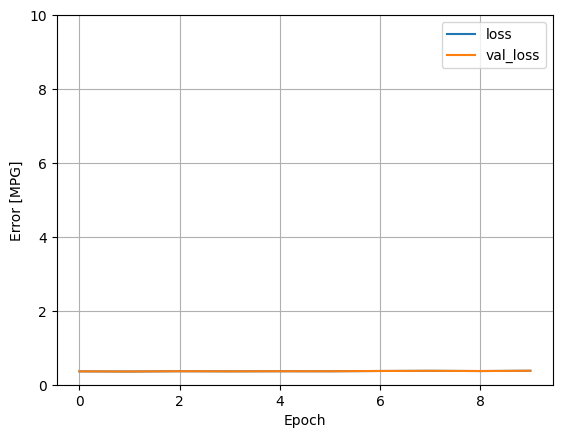

In [101]:
plot_loss(history)

In [103]:
test_results = {}

test_results['horsepower_model'] = tensorflow_model.evaluate(
    x_fit,
    y_fit, verbose=0)

In [104]:
a = tf.linspace(0.0, 250, 251)
b = tensorflow_model.predict(x)

7/7 [==============================] - 0s 12ms/step


In [105]:
def plot_horsepower(x, y):
      plt.scatter(df1['horsepower'], df1['rata harga'], label='Data')
      plt.plot(x, y, color='k', label='Predictions')
      plt.xlabel('Horsepower')
      plt.ylabel('MPG')
      plt.legend()

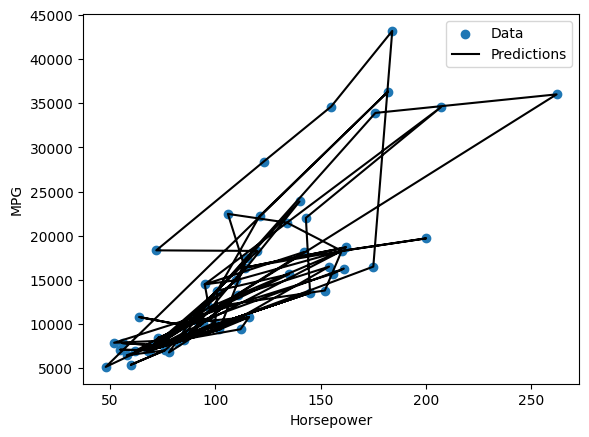

In [106]:
plot_horsepower(x, y)